In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
import math
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,confusion_matrix

In [21]:
dfname = pd.read_csv('data_tittles.csv', sep=',')



In [22]:
dfstyle = pd.read_csv('data_styles.csv', sep=',')



In [23]:
dfauthor = pd.read_csv('data_authors.csv', sep=',')



In [24]:


#1. import the dataset into pandas DataFrame
df1 = pd.read_csv('data.csv', sep=',')



In [25]:
df = pd.concat([df1, dfstyle], axis=1, join='inner')

In [26]:
dfWithName=pd.concat([df1, dfname], axis=1, join='inner')

# Exploratory Analysis

In [8]:
#1.1 Check th dataset has been correctly imported looking for NaN values
df.isnull().any().any() #answer is False, so no NaN values, import is correct

True

In [9]:
#descriptive statistics using pandas method
df.describe()

,0,0.1,0.2,0.3,0.4,14409608040,14611607240,15011607440,14411607640,12211607840,...,Unnamed: 5205,Unnamed: 5206,Unnamed: 5207,Unnamed: 5208,Unnamed: 5209,Unnamed: 5210,Unnamed: 5211,Unnamed: 5212,Unnamed: 5213,Unnamed: 5214
count,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.939830e+09,5.226488e+09,6.653031e+09,8.534229e+09,1.137054e+10,1.174773e+10,1.170215e+10,1.193394e+10,1.256563e+10,1.264837e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.316691e+09,6.921683e+09,7.410533e+09,7.164187e+09,5.891413e+09,5.883503e+09,5.565937e+09,5.420392e+09,4.789399e+09,4.591514e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.220876e+10,1.206031e+10,1.221086e+10,1.221006e+10,1.240925e+10,1.220900e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.240960e+10,1.360820e+10,1.360811e+10,1.340900e+10,1.330991e+10,1.361001e+10,1.330971e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.215861e+10,1.275925e+10,1.450865e+10,1.425846e+10,1.495920e+10,1.555901e+10,1.490900e+10,1.536080e+10,1.475916e+10,1.491110e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.681060e+10,1.741121e+10,1.780901e+10,1.801201e+10,1.721140e+10,1.780821e+10,1.801161e+10,1.781140e+10,1.761101e+10,1.780881e+10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df=df.fillna(0)
#dfWithName=dfWithName.fillna(0)
df

,0,0.1,0.2,0.3,0.4,14409608040,14611607240,15011607440,14411607640,12211607840,...,Unnamed: 5206,Unnamed: 5207,Unnamed: 5208,Unnamed: 5209,Unnamed: 5210,Unnamed: 5211,Unnamed: 5212,Unnamed: 5213,Unnamed: 5214,POP
0,0,0,14810205840,0,14209405040,12009404240,12409404240,16209204840,15409404240,17612004240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
1,0,12008004040,13211004040,13208007440,12408204040,17608204040,17608004040,16208004040,12209604040,12208004040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CLASSIC
2,0,0,12609404840,17208007240,12608005440,12009005440,15209005440,12210806040,12210805440,12209005440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
3,0,0,0,0,0,0,0,0,12008004040,13008004040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
4,12208207640,12410404240,17809005640,18010404440,15410406040,14409004640,13408007440,13609006040,13608204640,13408806040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNKNOWN
5,12009805640,16410805440,13010805440,13010804240,13010804240,13008604240,13011004240,13010804240,13010804240,13010804240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
7,16810604040,13411404240,0,0,0,12408004240,12408204240,12408204040,16608204840,12208204840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ROCK
8,0,0,0,0,12808405440,13009005440,13008605840,17408605840,13008605840,17408605840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
9,15809604440,14410004640,14608204440,14808805840,16409806440,15408204440,15409805240,14408204440,15411404440,15408205840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metal


In [11]:
#Correlation matrix
correlations = df.corr()
correlations

,0,0.1,0.2,0.3,0.4,14409608040,14611607240,15011607440,14411607640,12211607840,...,Unnamed: 5205,Unnamed: 5206,Unnamed: 5207,Unnamed: 5208,Unnamed: 5209,Unnamed: 5210,Unnamed: 5211,Unnamed: 5212,Unnamed: 5213,Unnamed: 5214
0,1.000000,0.813538,0.602658,0.416990,0.239237,0.294290,0.282468,0.241475,0.250358,0.233397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,0.813538,1.000000,0.787268,0.565939,0.358778,0.387218,0.414789,0.322946,0.287446,0.252712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.602658,0.787268,1.000000,0.674906,0.502775,0.472212,0.468379,0.410243,0.287077,0.285435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.416990,0.565939,0.674906,1.000000,0.613764,0.634764,0.617810,0.500623,0.345467,0.390638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.239237,0.358778,0.502775,0.613764,1.000000,0.930360,0.885149,0.826485,0.663450,0.657688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14409608040,0.294290,0.387218,0.472212,0.634764,0.930360,1.000000,0.915361,0.850207,0.687599,0.678452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14611607240,0.282468,0.414789,0.468379,0.617810,0.885149,0.915361,1.000000,0.888604,0.715335,0.688033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15011607440,0.241475,0.322946,0.410243,0.500623,0.826485,0.850207,0.888604,1.000000,0.789014,0.719753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14411607640,0.250358,0.287446,0.287077,0.345467,0.663450,0.687599,0.715335,0.789014,1.000000,0.844212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12211607840,0.233397,0.252712,0.285435,0.390638,0.657688,0.678452,0.688033,0.719753,0.844212,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


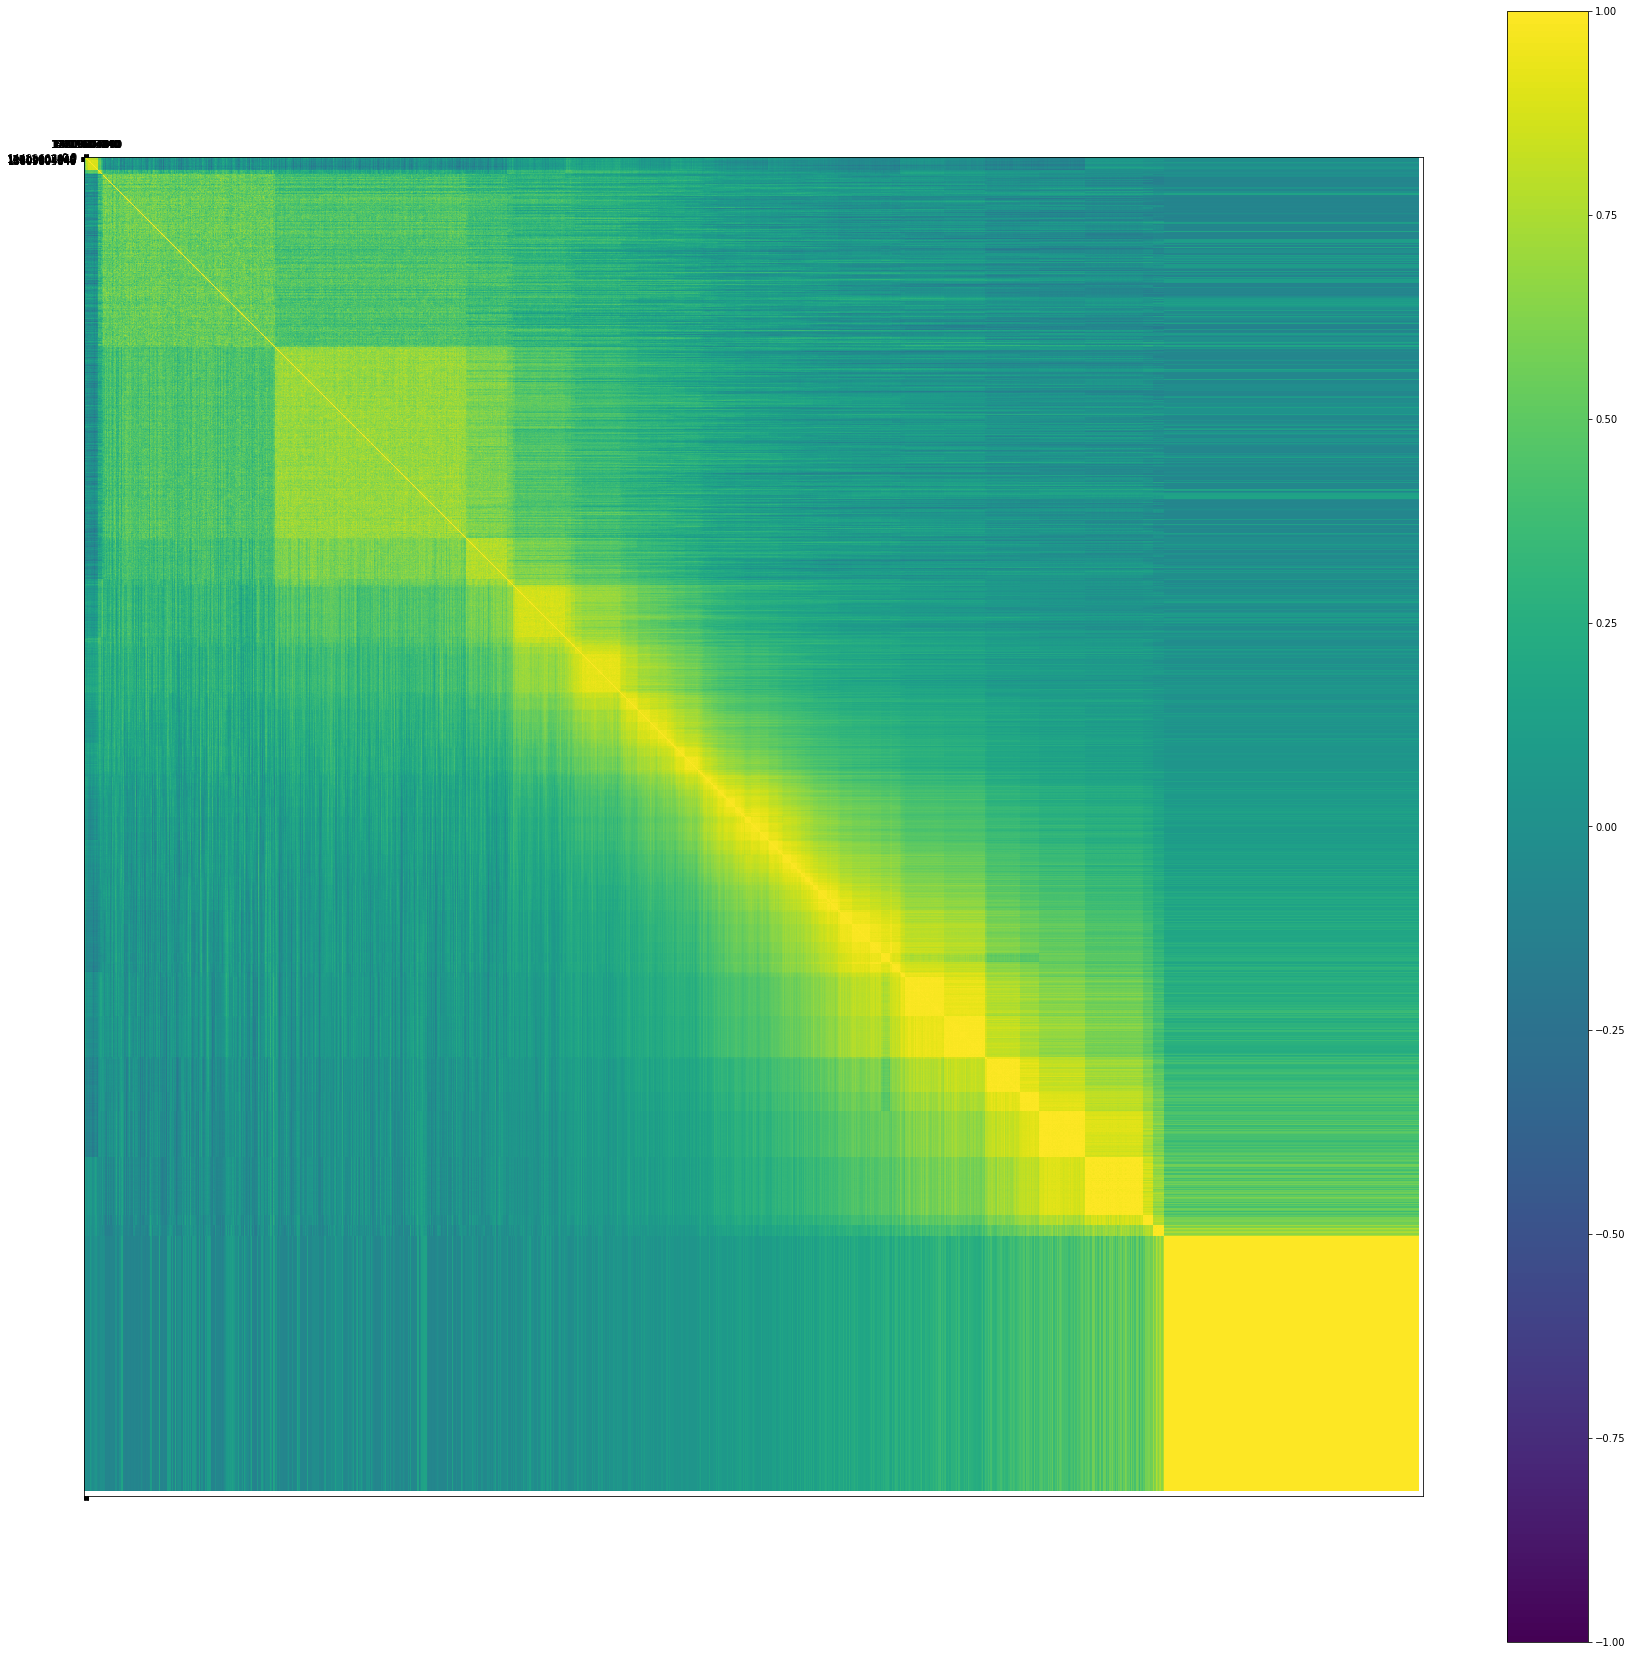

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# plot correlation matrix

names = list(correlations.columns)
fig = plt.figure(figsize=[30,30])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,18,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Unsupervised learning: clustering

In [13]:
df

,0,0.1,0.2,0.3,0.4,14409608040,14611607240,15011607440,14411607640,12211607840,...,Unnamed: 5206,Unnamed: 5207,Unnamed: 5208,Unnamed: 5209,Unnamed: 5210,Unnamed: 5211,Unnamed: 5212,Unnamed: 5213,Unnamed: 5214,POP
0,0,0,14810205840,0,14209405040,12009404240,12409404240,16209204840,15409404240,17612004240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
1,0,12008004040,13211004040,13208007440,12408204040,17608204040,17608004040,16208004040,12209604040,12208004040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CLASSIC
2,0,0,12609404840,17208007240,12608005440,12009005440,15209005440,12210806040,12210805440,12209005440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
3,0,0,0,0,0,0,0,0,12008004040,13008004040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
4,12208207640,12410404240,17809005640,18010404440,15410406040,14409004640,13408007440,13609006040,13608204640,13408806040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UNKNOWN
5,12009805640,16410805440,13010805440,13010804240,13010804240,13008604240,13011004240,13010804240,13010804240,13010804240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
6,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
7,16810604040,13411404240,0,0,0,12408004240,12408204240,12408204040,16608204840,12208204840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ROCK
8,0,0,0,0,12808405440,13009005440,13008605840,17408605840,13008605840,17408605840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POP
9,15809604440,14410004640,14608204440,14808805840,16409806440,15408204440,15409805240,14408204440,15411404440,15408205840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metal


In [27]:
df1=df1.fillna(0)


In [15]:
dataframe_std = pd.DataFrame(StandardScaler().fit_transform(df1))
cov_std = dataframe_std.corr()
cov_std
cov_std=cov_std.fillna(0)
cov_std

,0,1,2,3,4,5,6,7,8,9,...,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214
0,1.000000,0.813538,0.602658,0.416990,0.239237,0.294290,0.282468,0.241475,0.250358,0.233397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.813538,1.000000,0.787268,0.565939,0.358778,0.387218,0.414789,0.322946,0.287446,0.252712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.602658,0.787268,1.000000,0.674906,0.502775,0.472212,0.468379,0.410243,0.287077,0.285435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.416990,0.565939,0.674906,1.000000,0.613764,0.634764,0.617810,0.500623,0.345467,0.390638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.239237,0.358778,0.502775,0.613764,1.000000,0.930360,0.885149,0.826485,0.663450,0.657688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.294290,0.387218,0.472212,0.634764,0.930360,1.000000,0.915361,0.850207,0.687599,0.678452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.282468,0.414789,0.468379,0.617810,0.885149,0.915361,1.000000,0.888604,0.715335,0.688033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.241475,0.322946,0.410243,0.500623,0.826485,0.850207,0.888604,1.000000,0.789014,0.719753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.250358,0.287446,0.287077,0.345467,0.663450,0.687599,0.715335,0.789014,1.000000,0.844212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.233397,0.252712,0.285435,0.390638,0.657688,0.678452,0.688033,0.719753,0.844212,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df1=df1.fillna(0)
dataframe_std = pd.DataFrame(StandardScaler().fit_transform(df1))
cov_std = dataframe_std.corr()
cov_std=cov_std.fillna(0)

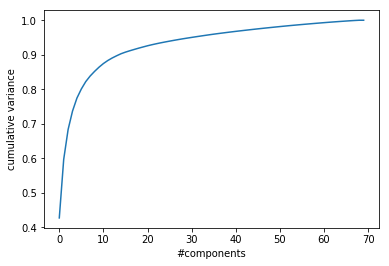

NameError: name 'dataset_std' is not defined

In [30]:
#We need to take components with the highest value to keep the information on the projection space. 
#Here we're sure that we need the first and the second. For the rest we run the computation bellow.

pca = PCA().fit(df1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('#components')
plt.ylabel('cumulative variance');
plt.show()

eig_vals, eig_vect = np.linalg.eig(cov_std)
eig_pairs = [(np.abs(eig_vals[i]), eig_vect[:,i]) for i in range(len(eig_vals))]

sum_ev = sum(eig_vals)
pve = [(i / sum_ev)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_pve = np.cumsum(pve)

fig = plt.figure(figsize=[10,5])
plt.scatter([i for i in range(len(dataset_std.columns))], pve, s=80)
plt.scatter([i for i in range(len(dataset_std.columns))], cum_var_pve, marker='+')
plt.legend(['Variance', 'Cumulative variance'])
plt.show()

In [ ]:
#We need to take components with the highest value to keep the information on the projection space. 
#Here we're sure that we need the first and the second. For the rest we run the computation bellow.

pca = PCA().fit(df1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('#components')
plt.ylabel('cumulative variance');
plt.show()

In [18]:
dataframe_pca = PCA(n_components=2).fit_transform(dataframe_std)

dataframe_pca

#the coordinates of the points projected into the space

array([[-2.43184575e+01,  8.64503380e+00],
       [ 3.07092157e+01, -2.09775863e+01],
       [-1.32240316e+01, -7.51935145e+00],
       [-1.57831568e+01, -2.43275572e+00],
       [ 4.12471304e+01, -1.16512322e+01],
       [ 5.96148896e+00, -1.26540660e+01],
       [ 1.55428402e+01, -2.54262160e+01],
       [-2.04669718e+00, -9.19325078e+00],
       [-1.16222002e+01, -9.41256259e+00],
       [-3.50603160e+00, -2.62779147e+01],
       [ 8.06059591e+01,  5.70693115e+00],
       [-3.56481682e+00, -1.13910491e+01],
       [-5.96775444e+00, -1.19510405e+01],
       [-2.59968099e+01,  1.57828982e+01],
       [ 2.31304250e+00, -1.80203460e+01],
       [-3.28596518e+01,  3.14959256e+01],
       [-1.91696315e+01,  8.93659594e-01],
       [-3.30748292e+01,  3.27906023e+01],
       [-2.78384502e+01,  1.95592046e+01],
       [-5.81749834e+01,  1.16496044e+02],
       [-2.51192893e+01,  1.14456787e+01],
       [ 3.22798188e+01, -2.08290525e+01],
       [-1.34881466e+01, -5.25026283e+00],
       [ 1.

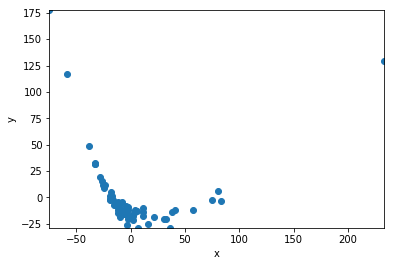

In [19]:
plt.scatter(dataframe_pca[:,0],dataframe_pca[:,1])

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(min(dataframe_pca[:,0]),max(dataframe_pca[:,0]))
plt.ylim(min(dataframe_pca[:,1]),max(dataframe_pca[:,1]))

plt.show()

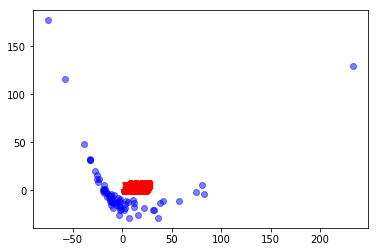

In [20]:
dat = pd.DataFrame(StandardScaler().fit_transform(df1))

pca = PCA(n_components = 2)
pca.fit(dat)

x_vec = pca.components_[0]
y_vec = pca.components_[1]

xs = pca.transform(dat)[:,0]
ys = pca.transform(dat)[:,1]

for i in range(len(x_vec)):
    plt.arrow(0, 0, x_vec[i]*max(xs), y_vec[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    
    plt.text(x_vec[i]*max(xs)*1.2, y_vec[i]*max(ys)*1.2,
             list(dat.columns.values)[i], color='r')

for i in range(len(xs)):
    plt.plot(xs[i], ys[i],'bo',alpha=0.5)

plt.show()

In [21]:
k = range(2,5)
silhouette = [0.0]*5
for n_clusters in k:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataframe_pca)
    silhouette_avg = silhouette_score(dataframe_pca, cluster_labels)
    silhouette[n_clusters] = silhouette_avg
    
# We compute the score for each cluster and take the closest to 1
best_nb_clust = silhouette.index(max(silhouette)) 
print("The best number of cluster is : "+str(best_nb_clust))

The best number of cluster is : 2


In [20]:
X = dataframe_pca
range_n_clusters = range(2,14)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)              
    fig.set_size_inches(18, 7)   
    
    # Limit of the figure for the silhouette -1, 1 
    ax1.set_xlim([-0.2, 1])                             
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator with speed = 10
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # Silhouette score between -1 (worse) and 1 (better) 
    silhouette_avg = silhouette_score(X, cluster_labels)  
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.inferno(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.inferno(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c= cluster_labels , edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("#clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

NameError: name 'dataframe_pca' is not defined

# Supervised learning:KNN alghorithm

Guessing style

In [8]:
trainingSet=[]
testSet=[]
split = 0.9

for x in range(len(df)-1):
    trainingSet.append(df.loc[x,:])

In [9]:
numbers=[]
for x in range(len(df)-1):
    if random.random() < split:
        trainingSet.append(df.loc[x,:])
    else:
        testSet.append(df.loc[x,:])
        numbers.append(x)

In [10]:
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors
 

In [11]:
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] == predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [12]:
print ('Train set: ' + repr(len(trainingSet)))
print ('Test set: ' + repr(len(testSet)))

Train set: 62
Test set: 7


In [13]:
predictions=[]
k = 5
for x in range(len(testSet)):
	neighbors = getNeighbors(trainingSet, testSet[x], k)
	result = getResponse(neighbors)
	predictions.append(result)
	print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1])+' song: '+dfname.iat[x,0])
accuracy = getAccuracy(testSet, predictions)
#print('Accuracy: ' + repr(accuracy) + '%')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in longlong_scalars
  after removing the cwd from sys.path.


> predicted='POP ', actual='POP' song: Stand By Me 
> predicted='POP ', actual='Metal' song: Mr Tambourine Man 
> predicted='POP ', actual='POP ' song: Feels 
> predicted='POP ', actual='CLASSIC' song: Havana 
> predicted='POP ', actual='ROCK' song: Arjit singh 
> predicted='POP ', actual='Metal' song: A Thousand Years 
> predicted='POP ', actual='POP' song: Fix You 


In [14]:
len(df.columns)

5216

finding closest songs

In [15]:
dfWithName=dfWithName.fillna(0)

In [16]:
trainingSet=[]
testSet=[dfWithName.loc[10,:],dfWithName.loc[6,:]]
for x in range(len(dfWithName)-1):
    trainingSet.append(dfWithName.loc[x,:])
    

In [18]:
def getResponse1(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = neighbors[x][-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]
 

In [19]:
predictions=[]
k = 5
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse1(neighbors)
    print('> search for ' + repr(testSet[x][-1]))
    for i in range(len(neighbors)):
        print('closest=' + str(neighbors[i][-1]))


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in longlong_scalars
  after removing the cwd from sys.path.


> search for 'Hotel California '
closest=Hotel California 
closest=Still Loving You 
closest=Holiday 
closest=Bohemian Rhapsody 
closest=Arjit singh 
> search for 'Fix You '
closest=Fix You 
closest=Always Somewhere 
closest=I'm Goin' Mad 
closest=Fast car  
closest=A Thousand Years 
